<a href="https://colab.research.google.com/github/vladi29/ANA-Classifier/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Universidad Simon Bolivar - 21 de Enero de 2022
# Trabajo final de grado: Clasificador de patrones ANA
# Vladimir Alfaro - 1510023

# Preprocesamiento de las imagenes

import pandas as pd
import time
import cv2
import numpy as np
import h5py
from torchvision import transforms
import random
from matplotlib import pyplot as plt
import albumentations as Alb
import os

In [2]:
# Directorios
 
#%cd drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database/
labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/AIDA_HEp2_GroundTruth.xlsx'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database'

df = pd.read_excel(labels_path, header = 0)
shuffled_df = df.sample(frac = 1).reset_index(drop = True)
shuffled_df.to_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')

data = pd.read_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')
labels_list = data['StainingPatterns'].values.tolist()
images_raw = data['ImageFileName'].values.tolist()
images_names = []
for name in images_raw:
  name = name.lower()
  images_names.append(name)

print(len(images_names))
print(len(set(images_names)))

for image_name in images_names:
  if images_names.count(image_name) > 1:
    print(image_name)

2079
2079


In [3]:
# Data agumentation

augmented_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
print(os.listdir(augmented_path))

transform = Alb.Compose(
    [
     Alb.Rotate(limit=45, p=1.0, border_mode=cv2.BORDER_CONSTANT),
     Alb.HorizontalFlip(p=0.5),
     Alb.VerticalFlip(p=0.5),
    ]
)

start_time = time.time()

original_labels, original_names = [], []
augmented_labels, augmented_names = [], []

i = 0
for image_name in images_names:
    label = labels_list[i]
    image_path = images_path + '/' + image_name
    image = cv2.imread(image_path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    green_channel = image[:,:,1]                                        # Extraemos el canal verde de de cada imagen
    image = np.zeros(image.shape)                                       # Imagen vacia
    image[:,:,1] = green_channel                                        # Sustituimos el canal verde en la imagen vacia, [2]
    image = (image - np.min(image))/(np.max(image) - np.min(image))     # Preprocesamiento para evitar ruido y normalizar cada canal, [2] y [8]
    image = cv2.resize(image, (224, 224))                               # Tamaño de las imagenes (ancho, alto) | 224x224 es el tama;o minimo de los modelos famosos en pytorch
    image_name = image_name.split('.')[0]
    np.savez_compressed(augmented_path+image_name+'_0.npz', image)
    augmented_labels.append(label)
    augmented_names.append(image_name+'_0.npz')
    original_labels.append(label)
    original_names.append(image_name+'_0.npz')
    for factor in range(0, 5):
      augmented_image = transform(image = image)['image']
      np.savez_compressed(augmented_path+image_name+"_"+str(factor+1)+'.npz', augmented_image)
      augmented_labels.append(label)
      augmented_names.append(image_name+"_"+str(factor+1)+'.npz')
    i += 1
    print("Imagenes procesadas: ", i)

final_time = time.time() - start_time

original_labels = np.asarray(original_labels)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/original_labels.csv', original_labels, fmt ='%s', delimiter = ',')

original_names = np.asarray(original_names)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/original_names.csv', original_names, fmt ='%s', delimiter = ',')

augmeted_labels = np.asarray(augmented_labels)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/augmented_labels.csv', augmented_labels, fmt ='%s', delimiter = ',')

augmented_names = np.asarray(augmented_names)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/augmented_names.csv', augmented_names, fmt ='%s', delimiter = ',')

print('Tiempo de preprocesado de las imagenes:', round(final_time/60, 3))
print('Cantidad original de imagenes: ', len(original_names))
print('Cantidad original de etiquetas: ', len(original_labels))
print('Cantidad total de imagenes: ', len(augmented_names))
print('Cantidad total de etiquetas: ', len(augmented_labels))

[]
Imagenes procesadas:  1
Imagenes procesadas:  2
Imagenes procesadas:  3
Imagenes procesadas:  4
Imagenes procesadas:  5
Imagenes procesadas:  6
Imagenes procesadas:  7
Imagenes procesadas:  8
Imagenes procesadas:  9
Imagenes procesadas:  10
Imagenes procesadas:  11
Imagenes procesadas:  12
Imagenes procesadas:  13
Imagenes procesadas:  14
Imagenes procesadas:  15
Imagenes procesadas:  16
Imagenes procesadas:  17
Imagenes procesadas:  18
Imagenes procesadas:  19
Imagenes procesadas:  20
Imagenes procesadas:  21
Imagenes procesadas:  22
Imagenes procesadas:  23
Imagenes procesadas:  24
Imagenes procesadas:  25
Imagenes procesadas:  26
Imagenes procesadas:  27
Imagenes procesadas:  28
Imagenes procesadas:  29
Imagenes procesadas:  30
Imagenes procesadas:  31
Imagenes procesadas:  32
Imagenes procesadas:  33
Imagenes procesadas:  34
Imagenes procesadas:  35
Imagenes procesadas:  36
Imagenes procesadas:  37
Imagenes procesadas:  38
Imagenes procesadas:  39
Imagenes procesadas:  40
Imagen

In [4]:
# Save total image in a compressed file

images_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
original_labels_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/original_labels.csv'
original_names_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/original_names.csv'
augmented_labels_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/augmented_labels.csv'
augmented_names_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/augmented_names.csv'
preprocessing_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/'

print(os.listdir(preprocessing_path))

original_labels_raw = pd.read_csv(original_labels_path, header = None)
original_labels_raw = original_labels_raw.values.tolist()
original_labels = []
for label in original_labels_raw:
  original_labels.append(label[0])

original_names = pd.read_csv(original_names_path, header = None)
original_names = original_names.values.tolist()

start_time = time.time()

with h5py.File('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/'+'Original_dataset.h5', 'w', libver='latest') as f:
  i = 0
  for name in original_names:
    image_name = name[0]
    image_path = images_path + image_name
    image = np.load(image_path)
    image = image['arr_0']
    print(image_name.split(".")[0])
    original_dataset = f.create_dataset(image_name.split(".")[0], data=image, compression='gzip')
    i += 1
    print("Imagenes guardadas: ", i)      

print(original_dataset)  

#----------------

augmented_labels_raw = pd.read_csv(augmented_labels_path, header = None)
augmented_labels_raw = augmented_labels_raw.values.tolist()
augmented_labels = []
for label in augmented_labels_raw:
  augmented_labels.append(label[0])

augmented_names = pd.read_csv(augmented_names_path, header = None)
augmented_names = augmented_names.values.tolist()

with h5py.File('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/'+'Augmented_dataset.h5', 'w', libver='latest') as f:
  i = 0
  for name in augmented_names:
    image_name = name[0]
    image_path = images_path + image_name
    image = np.load(image_path)
    image = image['arr_0']
    print(image_name.split(".")[0])
    augmented_dataset = f.create_dataset(image_name.split(".")[0], data=image, compression='gzip')
    i += 1
    print("Imagenes guardadas: ", i)      

print(augmented_dataset)  

final_time = time.time() - start_time
print('Tiempo para la creacion de los dataset en formato h5:', round(final_time/60, 3))

Streaming output truncated to the last 5000 lines.
736_1_3
Imagenes guardadas:  9976
736_1_4
Imagenes guardadas:  9977
736_1_5
Imagenes guardadas:  9978
260_3_0
Imagenes guardadas:  9979
260_3_1
Imagenes guardadas:  9980
260_3_2
Imagenes guardadas:  9981
260_3_3
Imagenes guardadas:  9982
260_3_4
Imagenes guardadas:  9983
260_3_5
Imagenes guardadas:  9984
29_1_0
Imagenes guardadas:  9985
29_1_1
Imagenes guardadas:  9986
29_1_2
Imagenes guardadas:  9987
29_1_3
Imagenes guardadas:  9988
29_1_4
Imagenes guardadas:  9989
29_1_5
Imagenes guardadas:  9990
389_3_0
Imagenes guardadas:  9991
389_3_1
Imagenes guardadas:  9992
389_3_2
Imagenes guardadas:  9993
389_3_3
Imagenes guardadas:  9994
389_3_4
Imagenes guardadas:  9995
389_3_5
Imagenes guardadas:  9996
147_1_0
Imagenes guardadas:  9997
147_1_1
Imagenes guardadas:  9998
147_1_2
Imagenes guardadas:  9999
147_1_3
Imagenes guardadas:  10000
147_1_4
Imagenes guardadas:  10001
147_1_5
Imagenes guardadas:  10002
678_1_0
Imagenes guardadas:  10003

Nombre de la imagen:  189_1_0
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


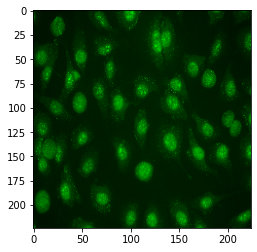

Nombre de la imagen:  257_2_0
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar


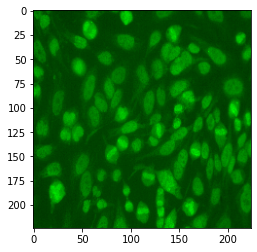

Nombre de la imagen:  311_5_0
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


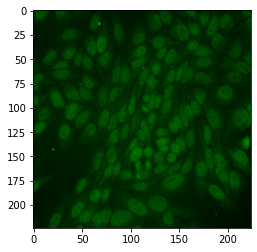

Nombre de la imagen:  321_2_0
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


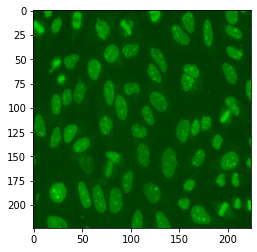

Nombre de la imagen:  216_1_0
Etiqueta de la imagen:  Midbody(MSA-2)_NUMA-1MSA-1


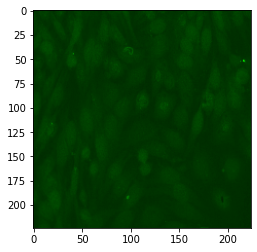

Nombre de la imagen:  223_2_0
Etiqueta de la imagen:  MultipleNuclearDots


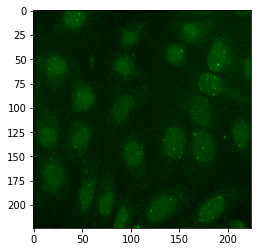

Nombre de la imagen:  741_1_0
Etiqueta de la imagen:  Negative


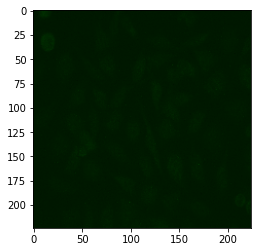

Nombre de la imagen:  254_1_0
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled


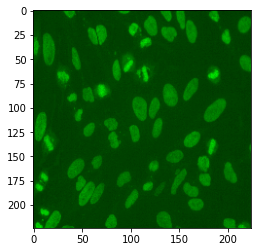

Nombre de la imagen:  28_2_0
Etiqueta de la imagen:  CoarseSpeckled


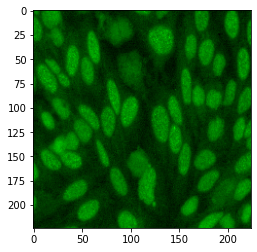

Nombre de la imagen:  264_1_0
Etiqueta de la imagen:  NuclearHomogeneous_CytoplasmicFibrillar


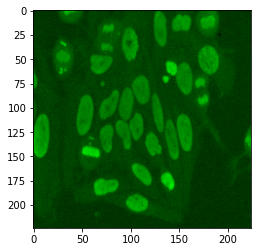

Nombre de la imagen:  316_3_0
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicSpeckled


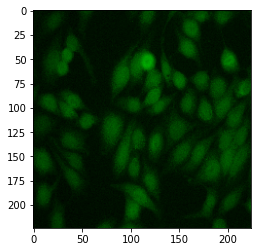

Nombre de la imagen:  379_2_0
Etiqueta de la imagen:  NuclearMembranous


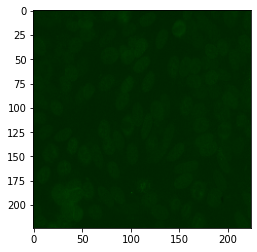

Nombre de la imagen:  522_1_0
Etiqueta de la imagen:  Negative


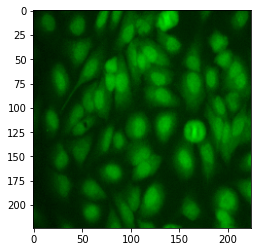

Nombre de la imagen:  670_1_0
Etiqueta de la imagen:  Negative


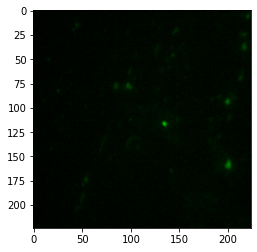

Nombre de la imagen:  143_2_0
Etiqueta de la imagen:  FineSpeckled_CytoplasmicFibrillar


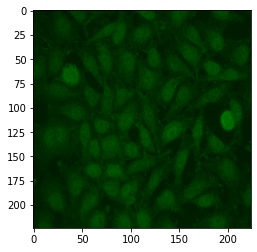

Nombre de la imagen:  320_3_0
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


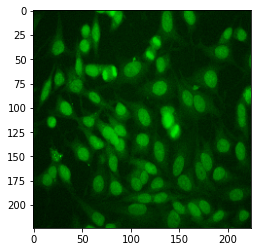

Nombre de la imagen:  45_5_0
Etiqueta de la imagen:  CoarseSpeckled_CytoplasmicSpeckled


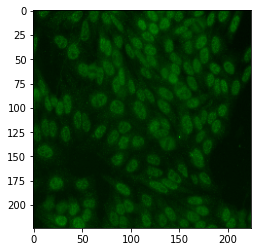

Nombre de la imagen:  306_1_0
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


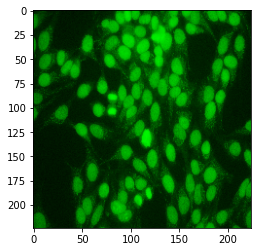

Nombre de la imagen:  378_3_0
Etiqueta de la imagen:  NuclearMembranous


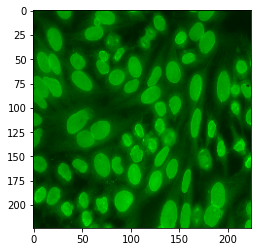

Nombre de la imagen:  140_2_0
Etiqueta de la imagen:  FineSpeckled_CytoplasmicFibrillar


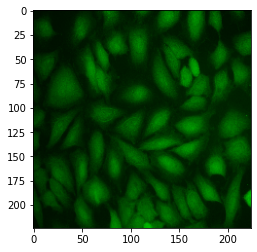

Nombre de la imagen:  250_2_0
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled


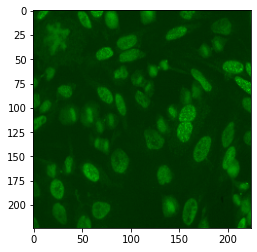

Nombre de la imagen:  77_2_0
Etiqueta de la imagen:  CytoplasmicPolarGolgiLike


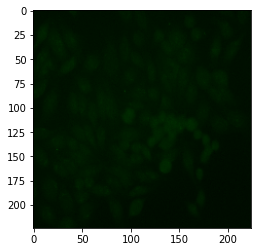

Nombre de la imagen:  244_3_0
Etiqueta de la imagen:  NuclearHomogeneous


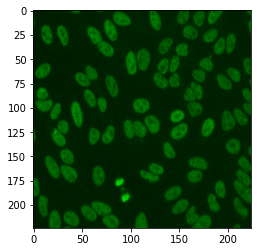

Nombre de la imagen:  189_2_0
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


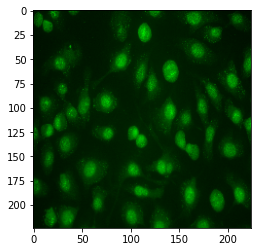

Nombre de la imagen:  464_1_0
Etiqueta de la imagen:  NucleolarSpeckled_FineSpeckled


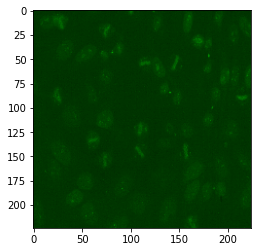

Nombre de la imagen:  189_1_0
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


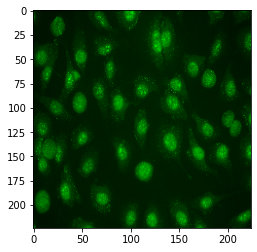

Nombre de la imagen:  189_1_1
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


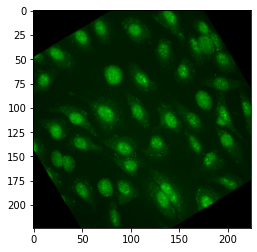

Nombre de la imagen:  189_1_2
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


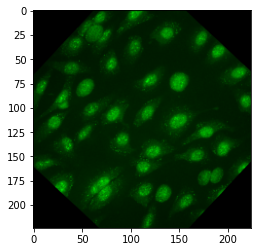

Nombre de la imagen:  189_1_3
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


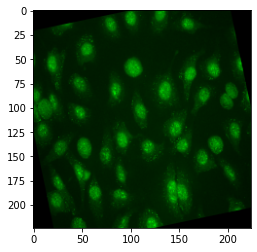

Nombre de la imagen:  189_1_4
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


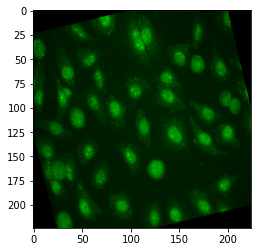

Nombre de la imagen:  189_1_5
Etiqueta de la imagen:  FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled


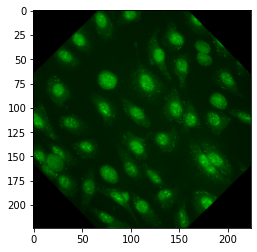

Nombre de la imagen:  257_2_0
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar


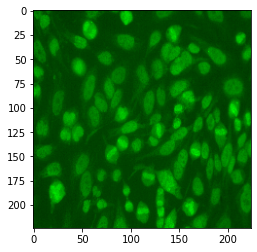

Nombre de la imagen:  257_2_1
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar


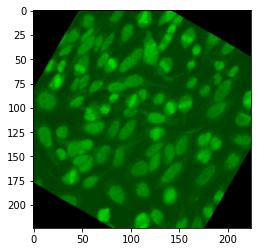

Nombre de la imagen:  257_2_2
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar


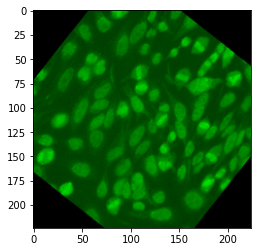

Nombre de la imagen:  257_2_3
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar


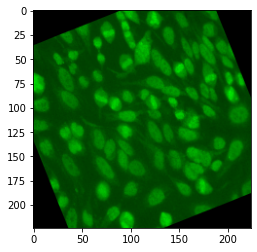

Nombre de la imagen:  257_2_4
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar


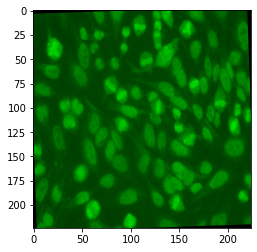

Nombre de la imagen:  257_2_5
Etiqueta de la imagen:  NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar


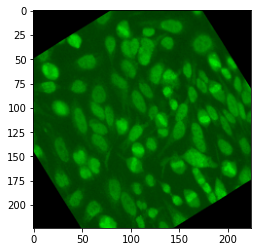

Nombre de la imagen:  311_5_0
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


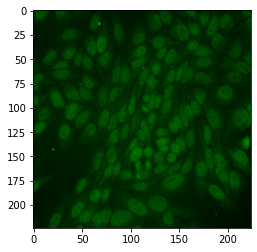

Nombre de la imagen:  311_5_1
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


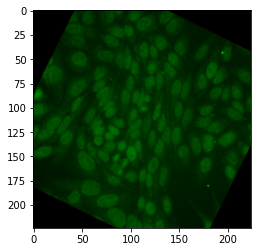

Nombre de la imagen:  311_5_2
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


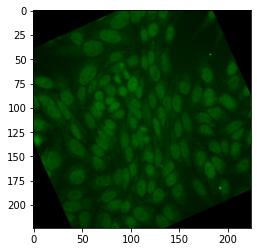

Nombre de la imagen:  311_5_3
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


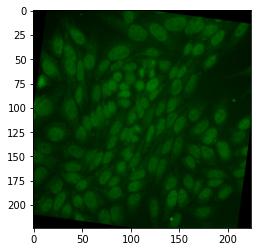

Nombre de la imagen:  311_5_4
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


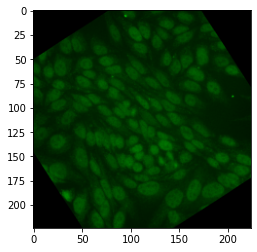

Nombre de la imagen:  311_5_5
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA


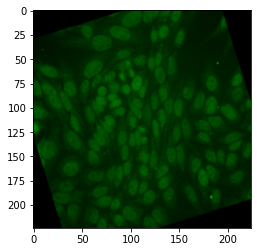

Nombre de la imagen:  321_2_0
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


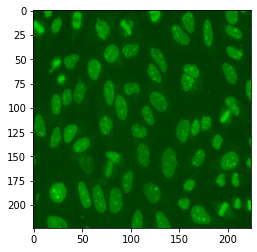

Nombre de la imagen:  321_2_1
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


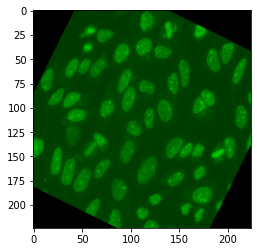

Nombre de la imagen:  321_2_2
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


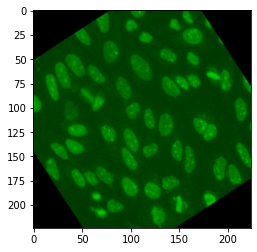

Nombre de la imagen:  321_2_3
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


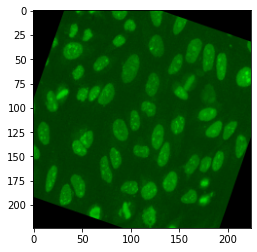

Nombre de la imagen:  321_2_4
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


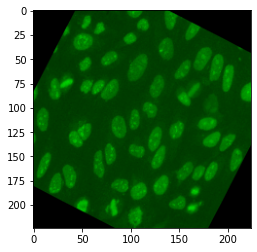

Nombre de la imagen:  321_2_5
Etiqueta de la imagen:  NuclearHomogeneous_FineSpeckled_NucleolarClumpy


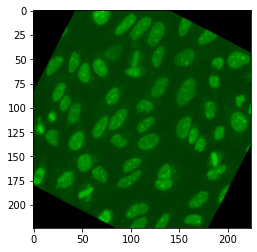

Nombre de la imagen:  216_1_0
Etiqueta de la imagen:  Midbody(MSA-2)_NUMA-1MSA-1


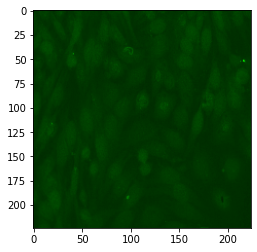

In [5]:
# Prove images with each label in the new file

images_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
original_labels_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/original_labels.csv'
original_names_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/original_names.csv'
augmented_labels_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/augmented_labels.csv'
augmented_names_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/augmented_names.csv'
preprocessing_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/'

original_labels_raw = pd.read_csv(original_labels_path, header = None)
original_labels_raw = original_labels_raw.values.tolist()
original_labels = []
for label in original_labels_raw:
  original_labels.append(label[0])

original_names = pd.read_csv(original_names_path, header = None)
original_names = original_names.values.tolist()

augmented_labels_raw = pd.read_csv(augmented_labels_path, header = None)
augmented_labels_raw = augmented_labels_raw.values.tolist()
augmented_labels = []
for label in augmented_labels_raw:
  augmented_labels.append(label[0])

augmented_names = pd.read_csv(augmented_names_path, header = None)
augmented_names = augmented_names.values.tolist()

original_dataset = h5py.File("drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/Original_dataset.h5", 'r')
augmented_dataset = h5py.File("drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/Augmented_dataset.h5", 'r')

for i in range(0,25):
  label = original_labels[i]
  image_name = original_names[i][0].split('.')[0]
  image = original_dataset.get(image_name)[:]
  print("Nombre de la imagen: ", image_name)
  print("Etiqueta de la imagen: ", label)
  plt.imshow(image)
  plt.show()

for i in range(0,25):
  label = augmented_labels[i]
  image_name = augmented_names[i][0].split('.')[0]
  image = augmented_dataset.get(image_name)[:]
  print("Nombre de la imagen: ", image_name)
  print("Etiqueta de la imagen: ", label)
  plt.imshow(image)
  plt.show()

original_dataset.close()
augmented_dataset.close()

In [6]:
#----------Get all labels----------
aux = ''
patterns = {}
for pattern in labels_list:
  if pattern != aux:
    patterns[pattern] = labels_list.count(pattern)
    aux = pattern
  else:
    continue

print(patterns)
print('Numero de patrones en el dataset: ', len(patterns))

{'FineSpeckled_NucleolarClumpy_CytoplasmicSpeckled': 9, 'NuclearHomogeneous_CoarseSpeckled_CytoplasmicFibrillar': 6, 'NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA': 29, 'NuclearHomogeneous_FineSpeckled_NucleolarClumpy': 6, 'Midbody(MSA-2)_NUMA-1MSA-1': 3, 'MultipleNuclearDots': 23, 'Negative': 581, 'NuclearHomogeneous_CoarseSpeckled': 24, 'CoarseSpeckled': 21, 'NuclearHomogeneous_CytoplasmicFibrillar': 28, 'NuclearHomogeneous_FineSpeckled_CytoplasmicSpeckled': 21, 'NuclearMembranous': 23, 'FineSpeckled_CytoplasmicFibrillar': 28, 'CoarseSpeckled_CytoplasmicSpeckled': 28, 'CytoplasmicPolarGolgiLike': 21, 'NuclearHomogeneous': 21, 'NucleolarSpeckled_FineSpeckled': 6, 'NucleolarClumpy_CytoplasmicReticularAMA': 12, 'FineSpeckled': 21, 'NuclearMembranous_NucleolarClumpy': 12, 'Centromere': 26, 'DSF-70': 21, 'NucleolarSpeckled': 23, 'NuclearHomogeneous_NucleolarClumpy': 24, 'NucleolarHomogeneous_CytoplasmicSpeckled': 5, 'FineSpeckled_Centriole': 24, 'FineSpeckled_NucleolarClumpy': 

In [7]:
#----------Verificar el estado de la memoria RAM----------
#!cat /proc/meminfo

In [8]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-notebook", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1507, in initialize
    self.init_webapp()
  File "/usr/local/lib/python3.7/dist-packages/notebook/notebookapp.py", line 1297, in init_webapp
    self.http_server.listen(port, self.ip)
  File "/usr/local/lib/python3.7/dist-packages/tornado/tcpserver.py", line 143, in listen
    sockets = bind_sockets(port, address=address)
  File "/usr/local/lib/python3.7/dist-packa